# 데이터 자동 수집을 위한 가이드

데이터 수집을 자동으로 해보자. 이번에는 crontab와 sqlite3를 사용하여 DB에 자동으로 적재 해보려한다. 추가로 csv도 누적으로 적재하는 연습을 가져보려 한다. 이번 연습을 통해 잘 마무리를 하고 앞으로 주식 데이터나, 날씨 또는 여러가지의 데이터들을 수집 하는 과정을 가지려 한다. 전반적으로 목차는 다음과 같다.
 - 주피터 파일 생성 후 데이터 수집 코드 생성
 - CSV저장 및 db 저장
 - 주피터 파일 파이썬으로 변경
 - crontab 을 사용하여 분당 데이터 적재
 
우선 주피터 파일에 데이터 수집 코드를 작성 하자

# 1.코드 작성

## 1-1.라이브러리 불러오기

In [13]:
import pandas as pd
import datetime
import sqlite3

## 1-2.datetime 불러오기

In [14]:
today = datetime.datetime.now()

## 1-3.칼럼 추가하기

In [15]:
datetime_df = pd.DataFrame({'year':[today.year],
                           'month':[today.month],
                           'day':[today.day],
                           'hour':[today.hour],
                           'minute':[today.minute]})

In [16]:
datetime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   year    1 non-null      int64
 1   month   1 non-null      int64
 2   day     1 non-null      int64
 3   hour    1 non-null      int64
 4   minute  1 non-null      int64
dtypes: int64(5)
memory usage: 168.0 bytes


## 1-4.csv 생성

In [17]:
datetime_df.month

0    12
Name: month, dtype: int64

In [18]:
datetime_df.to_csv('datetime_df.csv', index=False, mode ='a', header = False)

In [32]:
pd.read_csv('datetime_df.csv')

,year,month,day,hour,minute
0,2021,11,24,12,19
1,2021,11,24,12,36
2,2021,11,24,12,37
3,2021,11,24,12,38
4,2021,11,24,12,39
...,...,...,...,...,...
16510,2021,12,9,10,1
16511,2021,12,9,10,2
16512,2021,12,9,10,2
16513,2021,12,9,10,3


------------------

# 2. SQlite3
## 2-1.DB 호출
- employee.db가 없을 경우 새로 생성하며 연결
- employee.db가 있을경우 해당 db로 연걸

In [20]:
conn = sqlite3.connect("datetime5.db")

## 2-2.cursor 생성
- conn.cursor을 통해 Cursor를 하나 생성

In [21]:
cur = conn.cursor()

## 2-3.conn.execute를 통해 datetime_data5 테이블을 생성합니다.

In [22]:
conn.execute('CREATE TABLE IF NOT EXISTS datetime_data5(year INTEGER, month INTEGER, day INTEGER, hour INTERGER, min INTERGER)')

## 2-4.data int 변경

dataframe에서 데이터 선택수 int로 변경 (SQL 테이블 생성시 자료형을 INTERGER 로 했기 때문)

In [23]:
year_value = int(datetime_df['year'])
month_value = int(datetime_df['month'])
day_value = int(datetime_df['day'])
hour_value = int(datetime_df['hour'])
minute_value = int(datetime_df['minute'])

In [24]:
datetime_df.year

0    2021
Name: year, dtype: int64

## 2-5.데이터 삽입 (insert)

생성해둔 데이터 프레임 datetime_df에서 각각의 데이터를 삽입

In [25]:
cur.execute('INSERT INTO datetime_data5 VALUES(:year, :month, :day, :hour, :minute);', 
            {"year":year_value, "month":month_value, "day":day_value, "hour": hour_value, "minute": minute_value})

## 2-6. 데이터 확인( select 구문 )

In [26]:
cur.execute("SELECT month, day, hour, min FROM datetime_data5")

## 2-7. pandas사용하여 데이터 프레임 호출

In [27]:
df = pd.DataFrame(cur.fetchall())

In [28]:
df

,0,1,2,3
0,11,24,9,49
1,11,24,9,50
2,11,24,9,51
3,11,24,9,52
4,11,24,9,53
...,...,...,...,...
8468,12,9,9,50
8469,12,9,9,51
8470,12,9,9,52
8471,12,9,9,53


## 2-8.변경사항 저장 (commit)

In [29]:
conn.commit()

In [30]:
#conn.rollback()

## 2-9.DB 종료

In [31]:
conn.close()

이렇게 데이터 수집 코드를 작성하고 주피터 파일을 파이썬 파일로 변경 해보자. 

# 3.크론탭 사용

## 3-1.주피터 파일 파이썬으로 변경

$ jupyter nbconvert --to script [파일명].ipynb 

파이썬 파일을 생성 했으니 이제 크론탭을 사용하여 자동화를 해보자. 이번에는 크론탭을 사용하지만 조만간에 airflow를 공부해서 포스팅 해보려 한다.

### 3-1.자동화를 위한 크론탭 

#### 크론탭 간략 설명

- crontab -e (크론탭 설정창 이동 코드)

- crontab -l (설정된 명령어 리스트 보기 코드)

#### 주기 설정
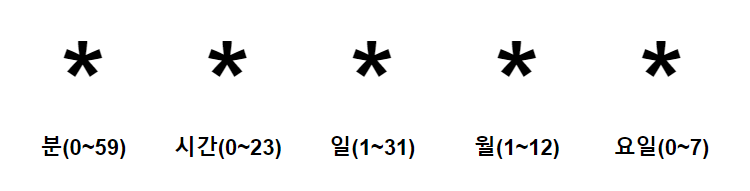

- 요일(0 ~ 7)은 0과7은 일요일,1(월요일) ~ 6(토요일)
### 주기 설정 예  
- 45 * * * * : 매시간 45분에 작업을 실행(1:45, 2:45, 3:45, 4:45.......)
- 40 7 * * 4 : 매주 목요일 오전 7시 40분에 작업 실행.

## 3-2 리눅스 명령어 설정
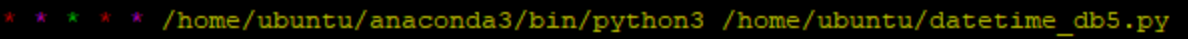

crontab -e 입력 하면 설정창으로 이동 한다. 그러면 a를 눌러 INSERT 모드로 변경 후 제일 밑으로 내려가 코드를 입력! <br>
주기 설정은 아무것도 입력 안하면 1분 단위로 실행 되는 코드 이다.다른 예도 밑에 적어 두도록 하겠다.<br>위 경로 선택/ 절대경로 선택까지 완료 후 Esc -> : -> wq(저장하고 나가기) -> Enter 나가기!

# 4. 확인 

## 4-1. csv 확인

pd.read_csv('datetime_df.csv')
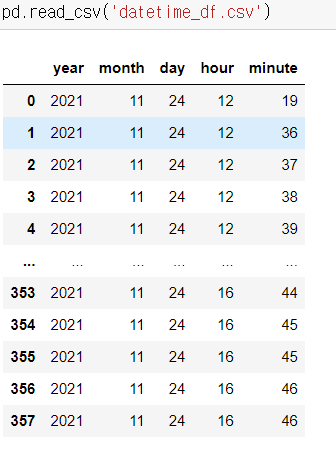


## 4-2. DB 확인

df = pd.DataFrame(cur.fetchall()) <br>
df
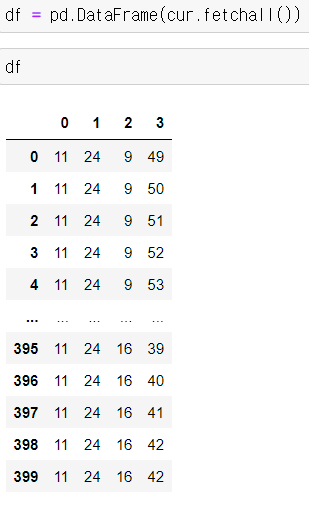

이렇게 마무리가 되었다. 이렇게 자동화가 되면 다음에 나에게 필요한 정보를 수집 할 때 정말 편리하면서 정보 수집에 많은 도움이 될거 같아 좋아보인다. 지금은 시간데이터만 자동화 했지만 다음에 더 좋은 정보를 수집해서 올려보도록 하자.